# Generate Dataset from Dota2 API

## Get Sumail's latest 500 Dota2 game

In [2]:
import time
import urllib2
import json

# limit: 500
# game_mode: 1.All pick  3.Random Draft (most popular game mode)
# version: 7.07 (latest game version)
player_dat = urllib2.urlopen("https://api.opendota.com/api/players/111620041/matches?limit=500#game_mode=1,3#patch=7.07").read()
print player_dat

[{"match_id":3564103153,"player_slot":2,"radiant_win":false,"duration":1973,"game_mode":22,"lobby_type":7,"hero_id":107,"start_time":1510786739,"version":null,"kills":4,"deaths":9,"assists":7,"skill":null,"leaver_status":0,"party_size":null},{"match_id":3559037317,"player_slot":0,"radiant_win":true,"duration":2231,"game_mode":2,"lobby_type":1,"hero_id":13,"start_time":1510535111,"version":20,"kills":3,"deaths":3,"assists":14,"skill":null,"leaver_status":0,"party_size":10},{"match_id":3558979253,"player_slot":0,"radiant_win":true,"duration":3048,"game_mode":2,"lobby_type":1,"hero_id":39,"start_time":1510530310,"version":20,"kills":10,"deaths":5,"assists":7,"skill":null,"leaver_status":0,"party_size":10},{"match_id":3558793494,"player_slot":0,"radiant_win":true,"duration":1894,"game_mode":2,"lobby_type":1,"hero_id":94,"start_time":1510517700,"version":20,"kills":6,"deaths":3,"assists":12,"skill":null,"leaver_status":0,"party_size":10},{"match_id":3558701651,"player_slot":0,"radiant_win":

## Extract 500 match id

In [3]:
player_dat_json = json.loads(player_dat)
sumail_match_id = []
f_sumail = open('sumail_match_id.txt','w')
for i in player_dat_json:
    sumail_match_id.append(i["match_id"])
    f_sumail.write(str(i["match_id"]) + '\n')
f_sumail.close()

## Get 500 matchs information

In [4]:
sumail_dat = []
ff_sumail = open('sumail_match.txt', 'w')
for i in range(0,100):
    match_dat = urllib2.urlopen("https://api.opendota.com/api/matches/" + str(sumail_match_id[i])).read()
    time.sleep(0.5)
    sumail_dat.append(match_dat)
    ff_sumail.write(match_dat + '\n')
    print i 
ff_sumail.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [18]:
# test
d = sumail_dat[0]
d_json = json.loads(d)
players = d_json['players']
for x in players:
    if x['account_id'] == 111620041:
        print x
        

{u'gold': 1018, u'firstblood_claimed': None, u'damage_inflictor_received': None, u'lh_t': None, u'repicked': None, u'damage_taken': None, u'kill_streaks': None, u'cosmetics': [], u'hero_id': 107, u'kills_log': None, u'account_id': 111620041, u'kills': 4, u'kills_per_min': 0.12164216928535226, u'start_time': 1510786739, u'isRadiant': True, u'backpack_1': 266, u'backpack_0': 214, u'leaver_status': 0, u'actions': None, u'killed': None, u'stuns': None, u'gold_per_min': 272, u'name': u'SumaiL', u'level': 16, u'damage_inflictor': None, u'patch': 26, u'item_4': 0, u'item_5': 244, u'item_2': 1, u'item_3': 92, u'item_0': 181, u'item_1': 36, u'sen_left_log': None, u'obs_placed': None, u'match_id': 3564103153L, u'kda': 1, u'pings': None, u'gold_reasons': None, u'total_gold': 8944, u'item_uses': None, u'duration': 1973, u'sen': None, u'lobby_type': 7, u'denies': 0, u'rune_pickups': None, u'killed_by': None, u'permanent_buffs': None, u'last_login': None, u'gold_t': None, u'xp_per_min': 361, u'abili

## Extracte certain variable

In [91]:
def get_match(id):
    match_dat = urllib2.urlopen("https://api.opendota.com/api/matches/" + str(id)).read()
    return match_dat 

def player_avg_1(matches, field):
    field_avg = 0.0
    num = len(matches)
    for i in matches:
        i_json = json.loads(i)
        field_avg += i_json[field]/float(num)
    return field_avg

def get_player_stats_in_match(match, player_id):
    players = match['players']
    for x in players:
        if x['account_id'] == player_id:
            return x

def player_avg_player(matches, player_id, field):
    field_avg = 0.0
    num = len(matches)
    for x in matches:
        x_json = json.loads(x)
        player_data = get_player_stats_in_match(x_json, player_id)
        y = player_data[field]
        if y == None:
            y = 0
        field_avg += y / float(num)
    return field_avg

def dat_dist_1(matches, field):
    match_fields = []
    f = open('match_' + field + '.csv', 'w')
    for match in matches:
        match_json = json.loads(match)
        for i in match_json:
            f.write(str(i[field]) + '\n')
            match_fields.append(i[field])
    f.close()
    return match_fields

def get_random_mataches(count, matches):
    res = []
    cur = 0
    f = open('randoms_matches.txt', 'a')
    for match in matches:
        match_json = json.loads(match)
        for x in match_json:
            m_detail = get_match(x['match_id'])
            f.write(str(m_detail) + '\n')
            time.sleep(0.4)
            cur += 1
            if cur == count:
                f.close()
                return res
    f.close()
    return res


def dat_player_dist_1(matches, field):
    res = []
    f = open('dat_player_' + field + '.csv', 'w')

    for match in matches:
        try:
            detail_json = json.loads(match)  
        except ValueError, e:
            continue
        players = detail_json['players']

        for y in players:
            p_data = y[field]
            #print p_data
            if p_data == None:
                p_data = 0
            res.append(p_data)
            f.write(str(p_data) + '\n')
    f.close()
    return res
  
def read_file(name):
    f = open(name, 'r')
    res = []
    for line in f:
        res.append(line)
    return res

In [19]:
import time
num_match = 1000
match_array = []
f = open("match_dat.txt", 'w')
for i in range(num_match):
    data = urllib2.urlopen("https://api.opendota.com/api/publicMatches").read()
    f.write(data + '\n')
    time.sleep(0.3)
    match_array.append(data)
f.close()

In [42]:
sumail_avg_duration = player_avg_1(sumail_dat, 'duration')
duration_dist = dat_dist_1(match_array, 'duration')
print sumail_avg_duration
print(duration_dist)

2205.01
[614, 829, 588, 1307, 1309, 1554, 1144, 1598, 1335, 1626, 1120, 1352, 1553, 1690, 1674, 1468, 1584, 1583, 1579, 1440, 1338, 1218, 1697, 1705, 1356, 1499, 1321, 1552, 1317, 1726, 1540, 1867, 1695, 1939, 1933, 1411, 1890, 1860, 1881, 1895, 1923, 1885, 1752, 471, 1322, 1907, 1428, 1668, 1764, 1542, 1893, 1374, 1390, 1585, 1803, 2040, 1643, 1555, 1917, 1875, 1960, 1824, 1979, 1884, 1768, 2005, 2040, 1911, 2172, 1954, 995, 1885, 1001, 1532, 1816, 2000, 2153, 1939, 2069, 1714, 2127, 1829, 1908, 2218, 1609, 1274, 1948, 1857, 1577, 2044, 628, 1987, 1878, 1867, 1957, 2083, 2137, 1414, 534, 2249, 614, 829, 588, 1307, 1309, 1554, 1144, 1598, 1335, 1626, 1120, 1352, 1553, 1690, 1674, 1468, 1584, 1583, 1579, 1440, 1338, 1218, 1697, 1705, 1356, 1499, 1321, 1552, 1317, 1726, 1540, 1867, 1695, 1939, 1933, 1411, 1890, 1860, 1881, 1895, 1923, 1885, 1752, 471, 1322, 1907, 1428, 1668, 1764, 1542, 1893, 1374, 1390, 1585, 1803, 2040, 1643, 1555, 1917, 1875, 1960, 1824, 1979, 1884, 1768, 2005, 2040, 

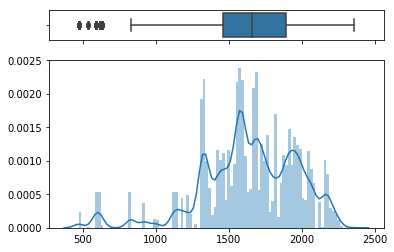

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#test = pd.read_csv("test.csv")
#print test
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(duration_dist, ax=ax_box)
sns.distplot(duration_dist, ax=ax_hist, hist=True, kde=True, rug=False, bins = 100)
ax_box.set(xlabel='')
plt.show()

In [83]:
#damage_dist = dat_player_dist_1(match_array, 'hero_damage')
#random_matches = get_random_mataches(10000, match_array)
random_matches = read_file('randoms_matches.txt')
test_j = json.loads(random_matches[0])
print test_j['match_id']

3565374102


In [92]:

sumail_id = 111620041
sumail_avg_damage = player_avg_player(sumail_dat, sumail_id, 'hero_damage')

print sumail_avg_damage

damage_dist = dat_player_dist_1(random_matches, 'hero_damage')
print damage_dist


1651
25668.63
[452, 363, 676, 3321, 0, 182, 371, 446, 1150, 2350, 1882, 1193, 1354, 11573, 218, 2866, 1037, 1717, 3385, 141, 4317, 2866, 2051, 1592, 2980, 1128, 2301, 1266, 713, 1805, 78, 1666, 8447, 20371, 2556, 3529, 5464, 2747, 4229, 13586, 11067, 7619, 17581, 4447, 9298, 3270, 6253, 7640, 3378, 6612, 4040, 0, 12138, 8805, 0, 0, 239, 22895, 62, 5506, 4883, 6973, 8070, 2815, 4038, 19018, 11542, 3397, 4571, 5022, 4587, 8505, 10035, 8546, 6662, 8062, 12960, 25571, 6883, 17560, 9830, 4151, 4501, 12223, 2871, 13113, 17156, 11285, 11371, 12482, 20177, 9983, 12063, 5560, 14985, 9043, 5526, 6932, 12768, 8480, 5222, 3678, 4025, 20916, 4447, 7406, 6442, 1701, 2910, 154, 5953, 11908, 14504, 7238, 4360, 4582, 6279, 1391, 3602, 5859, 10336, 4265, 1737, 5850, 8608, 1452, 5021, 10589, 13276, 9657, 11449, 4699, 10865, 4411, 5412, 22154, 13366, 19172, 1320, 0, 7128, 9493, 6586, 6469, 15784, 24827, 28248, 18662, 9660, 8656, 7351, 7482, 6743, 2732, 2658, 3676, 11073, 4405, 8934, 7850, 5291, 3625, 1027

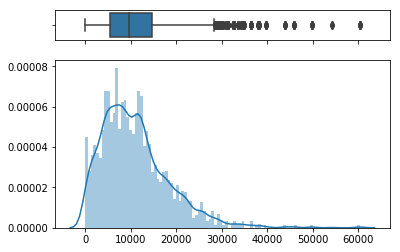

In [93]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(damage_dist, ax=ax_box)
sns.distplot(damage_dist, ax=ax_hist, hist=True, kde=True, rug=False, bins = 100)
ax_box.set(xlabel='')
plt.show()

In [97]:
sumail_creeps_stacked = player_avg_player(sumail_dat, sumail_id, 'creeps_stacked')

print sumail_creeps_stacked

creeps_stacked_dist = dat_player_dist_1(random_matches, 'creeps_stacked')
print creeps_stacked_dist

2.35
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

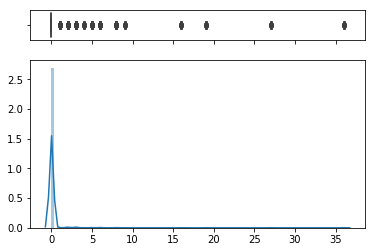

In [98]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(creeps_stacked_dist, ax=ax_box)
sns.distplot(creeps_stacked_dist, ax=ax_hist, hist=True, kde=True, rug=False, bins = 100)
ax_box.set(xlabel='')
plt.show()

In [99]:
sumail_denies = player_avg_player(sumail_dat, sumail_id, 'denies')

print sumail_denies

denies_dist = dat_player_dist_1(random_matches, 'denies')
print denies_dist

14.89
[0, 3, 0, 4, 0, 1, 0, 0, 2, 3, 5, 3, 3, 36, 0, 1, 0, 4, 6, 3, 9, 2, 13, 0, 7, 4, 10, 1, 2, 5, 0, 4, 2, 2, 5, 1, 0, 5, 16, 3, 0, 1, 26, 3, 6, 1, 1, 1, 2, 6, 1, 0, 3, 1, 0, 0, 0, 0, 0, 1, 7, 3, 1, 0, 4, 8, 3, 0, 2, 0, 2, 8, 1, 2, 1, 10, 8, 5, 3, 2, 9, 1, 8, 6, 1, 18, 11, 1, 0, 1, 6, 6, 4, 3, 7, 4, 2, 1, 2, 2, 1, 23, 2, 8, 2, 4, 1, 6, 0, 0, 1, 1, 2, 6, 6, 2, 2, 4, 14, 0, 5, 0, 0, 13, 0, 2, 1, 0, 13, 0, 13, 6, 13, 1, 1, 1, 13, 10, 4, 0, 18, 0, 3, 4, 19, 10, 3, 0, 3, 5, 8, 2, 10, 0, 4, 1, 7, 11, 11, 3, 0, 8, 0, 6, 3, 1, 15, 16, 15, 4, 5, 5, 6, 6, 5, 6, 2, 3, 0, 9, 7, 3, 7, 12, 3, 0, 17, 0, 4, 1, 4, 7, 10, 5, 4, 9, 8, 10, 6, 8, 4, 2, 0, 25, 0, 17, 10, 17, 1, 4, 3, 2, 2, 0, 1, 15, 0, 6, 2, 5, 1, 6, 7, 30, 5, 9, 1, 6, 8, 10, 22, 6, 38, 0, 5, 10, 0, 0, 1, 18, 7, 4, 10, 20, 5, 1, 0, 4, 2, 16, 27, 0, 41, 8, 1, 3, 11, 12, 4, 3, 1, 1, 10, 9, 1, 12, 15, 0, 0, 8, 0, 0, 4, 7, 1, 8, 1, 7, 0, 10, 34, 6, 0, 13, 2, 9, 2, 5, 2, 3, 10, 19, 0, 1, 6, 8, 22, 18, 6, 1, 2, 10, 9, 2, 3, 0, 2, 14, 21, 4, 8, 

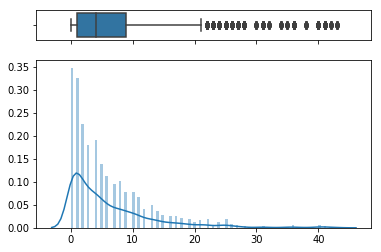

In [100]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(denies_dist, ax=ax_box)
sns.distplot(denies_dist, ax=ax_hist, hist=True, kde=True, rug=False, bins = 100)
ax_box.set(xlabel='')
plt.show()